## 문제 1. 
- 기존 시각화를 16개 그래프를 4 x 4 형태로 변형해서 시각화를 그리세요

In [1]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: C:\Users\user\Desktop\hk_data\ns_book7.csv
100%|██████████████████████████████████████████████████████████████████████████████| 53.8M/53.8M [01:14<00:00, 724kB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()
ns_book9 = ns_book9.reset_index()

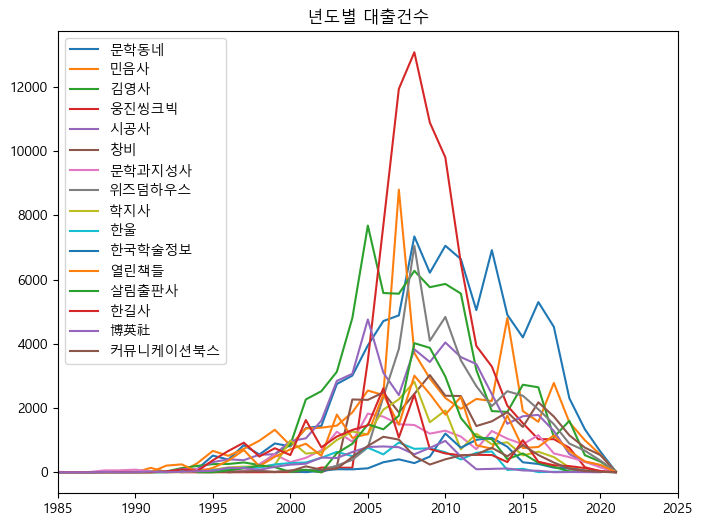

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.rcParams['font.family'] = 'Malgun Gothic' # 옵션 설정

fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:16]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
plt.show()

In [12]:
import warnings
warnings.filterwarnings('ignore')

- if-else 조건 사용

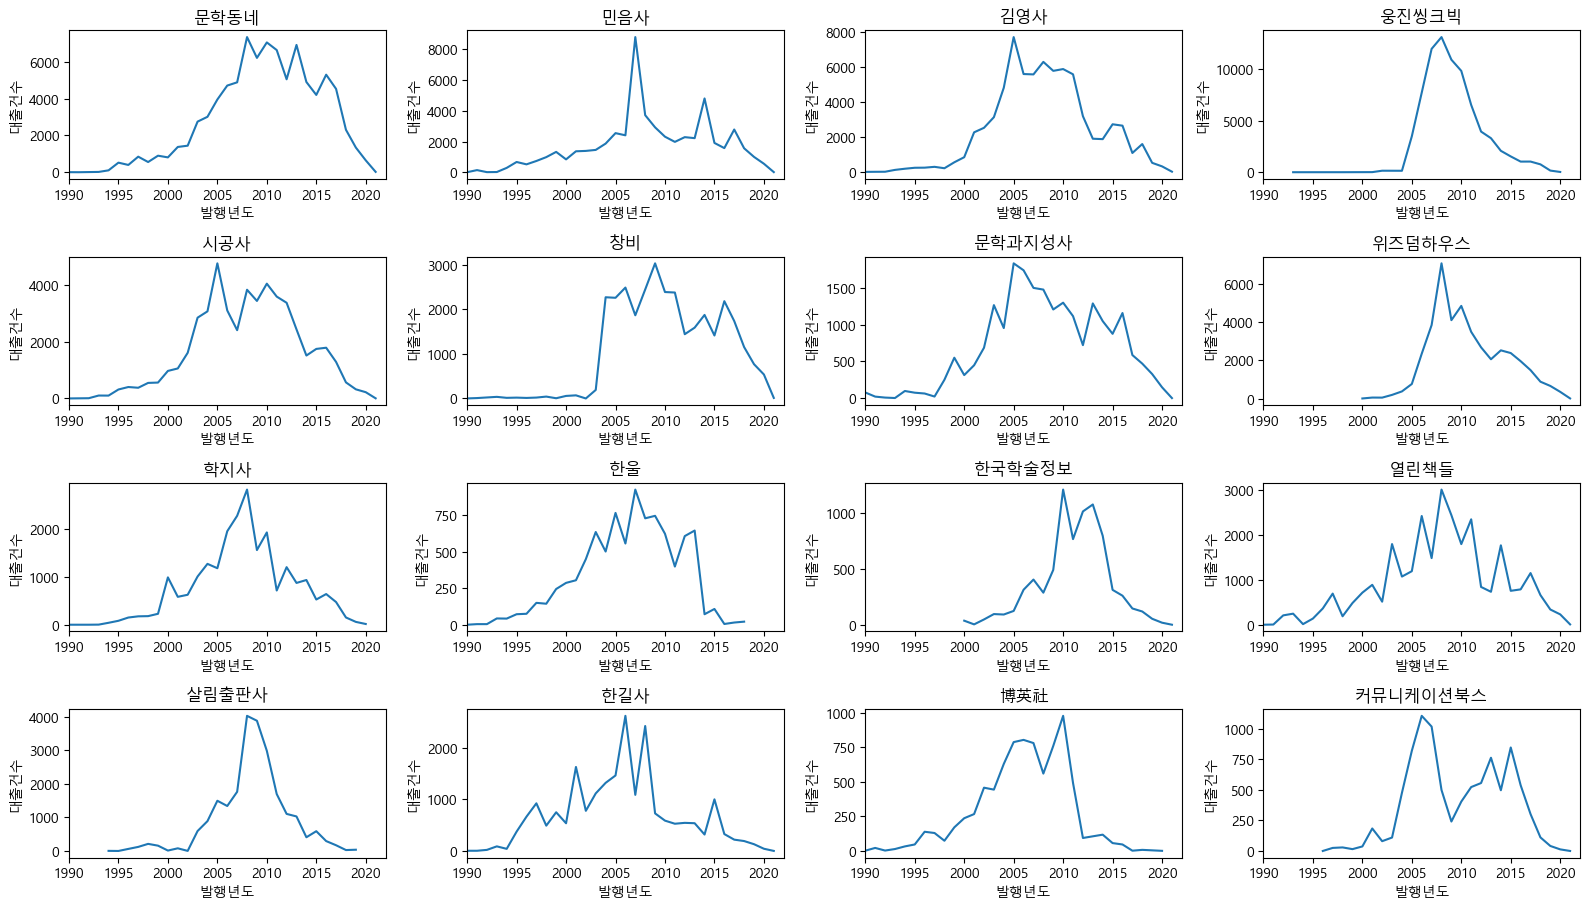

In [53]:
fig, ax = plt.subplots(4, 4, figsize=(16, 10))
plt.rcParams['font.family'] = 'Malgun Gothic' # 옵션 설정

for i, pub in enumerate(top30_pubs.index[:16]):
    plt.subplot(4,4,i+1)
    line = ns_book9[ns_book9['출판사'] == pub]
    sns.lineplot(x= line['발행년도'], y=line['대출건수'])
    plt.title(pub)
    plt.xlim([1990, 2022])
    
    
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 좀 더 간결하게 해보자

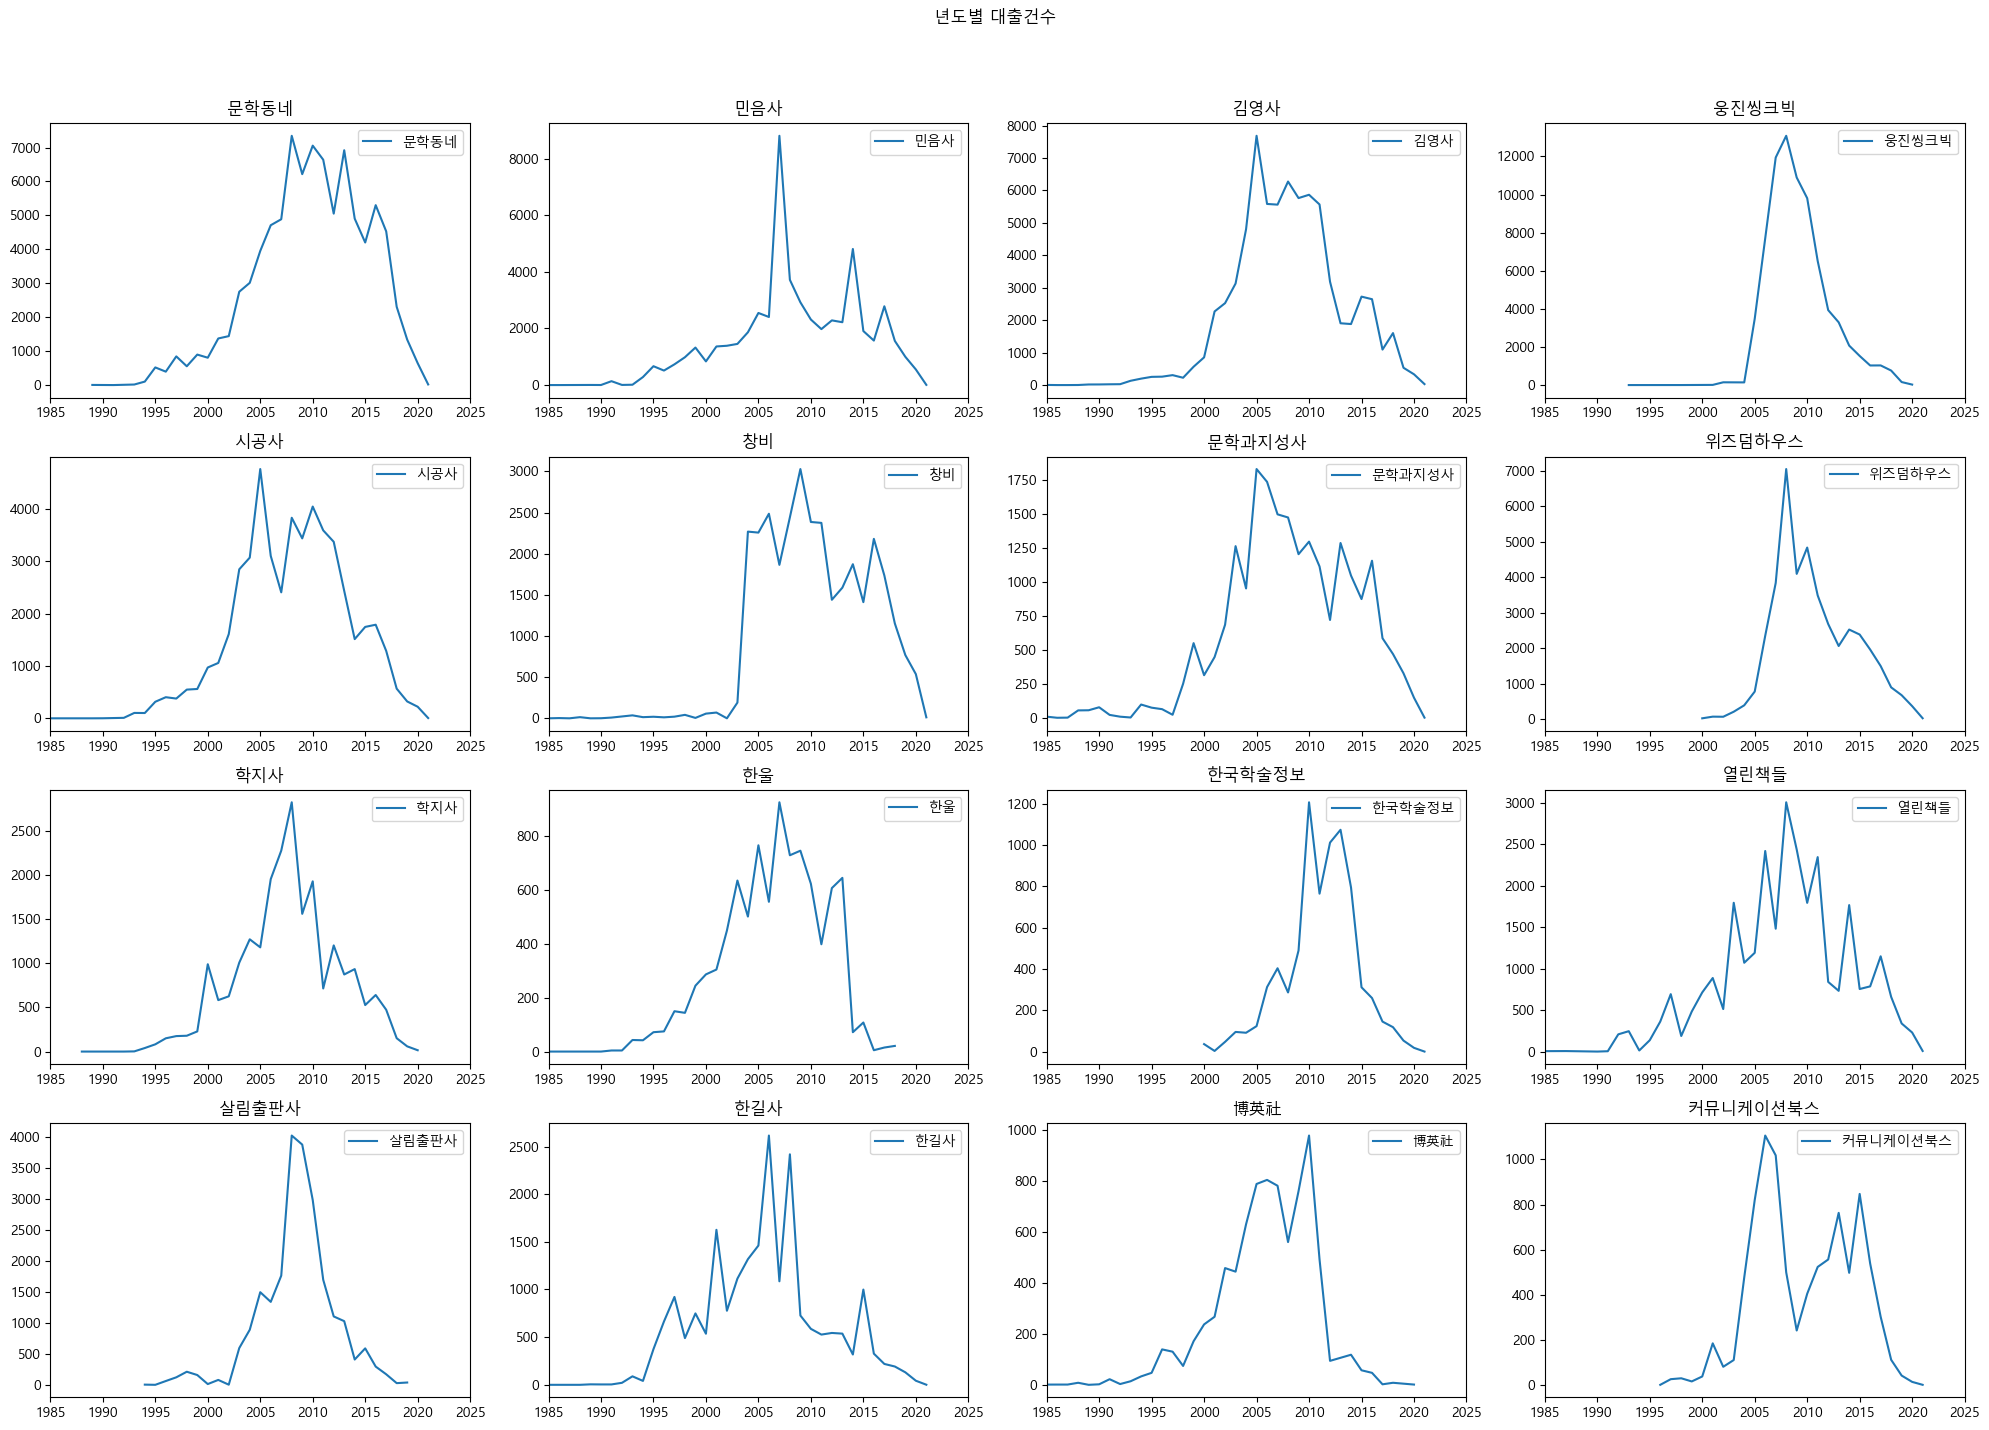

In [9]:
fig, ax = plt.subplots(4, 4, figsize=(16, 10))
for i, pub in enumerate(top30_pubs.index[:16]):
   # code
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 문제 2. 
-  대출건수가 10 이상인 도서들을 필터링하는 코드를 작성하세요. 

In [14]:
ns_book7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376770 entries, 0 to 376769
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   번호       376770 non-null  int64 
 1   도서명      376770 non-null  object
 2   저자       376770 non-null  object
 3   출판사      376770 non-null  object
 4   발행년도     376770 non-null  int64 
 5   ISBN     376770 non-null  object
 6   세트 ISBN  55866 non-null   object
 7   부가기호     308252 non-null  object
 8   권        61793 non-null   object
 9   주제분류번호   359792 non-null  object
 10  도서권수     376770 non-null  int64 
 11  대출건수     376770 non-null  int64 
 12  등록일자     376770 non-null  object
dtypes: int64(4), object(9)
memory usage: 37.4+ MB


In [15]:
ns_book7.loc[ns_book7['대출건수'] >= 10]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
108,110,파친코,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129815,9788970129808,0,1,843.6,1,39,2021-03-12
109,111,파친코,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129822,9788970129808,0,2,843.6,1,33,2021-03-12
1627,1698,어떻게 죽을 것인가 :현대 의학이 놓치고 있는 삶의 마지막 순간,아툴 가완디 지음 ;김희정 옮김,부키,2020,9788960514799,NaN,0,NaN,126.5,1,114,2021-02-10
1631,1702,"보이지 않는 건축, 움직이는 도시 :도시와 건축을 성찰하다",승효상 지음,돌베개,2017,9788971997505,NaN,NaN,NaN,540.4,1,19,2021-02-10
1633,1704,이제 나부터 좋아하기로 했습니다 :실은 조금도 괜찮지 않은 나를 위해,엔도 슈사쿠 지음 ;김영주 옮김,북스토리,2018,9791155641743,NaN,NaN,NaN,834,1,14,2021-02-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347796,370489,8주 웰빙 다이어트=8 Weeks well-being diet,강재헌;정다연 [같이]지음,푸른숲,2004,9788971844106,NaN,1,NaN,517.32,6,65,2004-10-19
348367,371095,한국단편문학선집,김동화 저,시공사,2001,9788952712776,9788952712752,NaN,2,813.608,2,29,2004-10-19
348581,371354,부동산 공법,이장춘...[등] 편저,한겨레플러스,2004,9788990677136,NaN,1,NaN,363.64,3,24,2004-10-17
348582,371355,노을에 중독되다,자유빈 지음,영언문화사,2004,9788974664510,9788974664503,0,1,813.6,2,75,2004-10-11


## 문제 3
- isin 함수를 사용하여 저자가 '김동훈' 또는 '김태형'인 도서들을 필터링하세요.

In [16]:
# code
ns_book7.loc[ns_book7['저자'].isin(['김동훈','김태형'])]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
18188,19016,혐오 시대 헤쳐가기,김태형,열린책들,2019,9788932920009,NaN,NaN,NaN,NaN,1,1,2020-01-23


In [17]:
ns_book7.loc[ns_book7['저자']=='김동훈']

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자


## 문제 4. 
- 발행년도가 2020년 이상이고 대출건수가 5 이상인 도서들을 필터링하는 코드를 작성하세요.

In [19]:
# code
ns_book7.loc[(ns_book7['발행년도']>=2020) &(ns_book7['대출건수']>=5)]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1627,1698,어떻게 죽을 것인가 :현대 의학이 놓치고 있는 삶의 마지막 순간,아툴 가완디 지음 ;김희정 옮김,부키,2020,9788960514799,NaN,0,NaN,126.5,1,114,2021-02-10
1729,1803,건강하게 나이 든다는 것 :무엇이 우리의 노년을 결정하는가,마르타 자라스카 지음 ;김영선 옮김,어크로스,2021,9791190030809,NaN,0,NaN,511.1687,1,6,2021-02-09
1764,1840,방구석 미술관 :가볍게 시작해 볼수록 빠져드는 한국 현대미술,조원재 지음,블랙피쉬,2021,9788968332845,NaN,0,2,650.4,1,9,2021-02-09
1807,1884,어떻게 말해줘야 할까 :오은영의 현실밀착 육아회화,지은이: 오은영 ;그린이: 차상미,김영사,2021,9788934986652,NaN,1,NaN,598.1,1,11,2021-02-09
1841,1920,당신의 인생을 정리해드립니다:삶이 바뀌는 신박한 정리,이지영 지음,쌤앤파커스,2020,9791165342333,NaN,1,NaN,595.4,1,5,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280356,300048,불교철학 입문,사이구사 미쯔요시 지음,경서원,2541,9788985101073,NaN,0,NaN,221,1,9,2006-07-14
289225,309320,유식학 강좌:불교심리학과 우주론,고목 지음,삼양,2545,9788985464376,NaN,9,NaN,221,1,9,2006-02-28
308863,329776,觀 쉴 줄 아는 지혜,구선 지음,연화,2547,9788995394908,NaN,0,NaN,220.1,1,6,2005-06-19
309627,330579,(영어로 생각하는)금강경=The Diamond Sutra in English,이대성 지음,향림출판사,2548,9788995523117,NaN,0,NaN,223.53,1,14,2005-06-12


## 문제 5. 
- apply와 lambda를 사용하여 대출건수가 5 이상인 도서들의 도서명을 대문자로 변환하는 코드를 작성하세요.
    + 예: 해커스 토익:LISTENING ==> *** 해커스 토익:LISTENING ***
    + 새로운 컬럼명을 추가하세요. '도서명 + 5건이상'

In [34]:
# code
ns_book7['도서명 + 5건이상'] = ns_book7.apply(lambda x: x['도서명'].upper() if x['대출건수'] >= 5 else "NaN", axis=1)

In [54]:
ns_book7.loc[ns_book7['대출건수'] >= 5.0, '도서명']

108                                        파친코
109                                        파친코
1626                           탐독 :유목적 사유의 탄생 
1627      어떻게 죽을 것인가 :현대 의학이 놓치고 있는 삶의 마지막 순간 
1631         보이지 않는 건축, 움직이는 도시 :도시와 건축을 성찰하다 
                          ...                 
348367                                한국단편문학선집
348581                                  부동산 공법
348582                                노을에 중독되다
348583                                      이드
372135                                   글 SOS
Name: 도서명, Length: 210569, dtype: object

In [55]:
ns_book7['도서명 + 5건이상'] = ns_book7.loc[ns_book7['대출건수'] >= 5.0, '도서명'].apply(lambda x: "*** " + x + " ***")

## 문제 6. 
- 위 변형된 데이터셋에서 대출건수가 4와 5인 건수만 출력하세요. 

In [38]:
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,도서명 + 5건이상
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN


In [39]:
ns_book7.loc[ns_book7['대출건수'].isin([4,5])]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,도서명 + 5건이상
121,134,그럼에도 나는 아파트를 사기로 했다,지은이: 박성혜,매경출판,2021,9791164841868,NaN,0,NaN,327.87,1,4,2021-03-12,NaN
1431,1488,"빌 게이츠, 기후재앙을 피하는 법","빌 게이츠 지음, 김민주.이엽 옮김",김영사,2021,9788934991366,NaN,NaN,NaN,539.9,1,4,2021-02-23,NaN
1562,1629,서울 아파트 황금 지도 (부동산 입지분석 고수 탑곰의 비밀 노트),탑곰,비에이블,2021,9791190931335,NaN,NaN,NaN,327.87,1,4,2021-02-16,NaN
1612,1683,이어령 80년 생각 :'창조적 생각'의 탄생을 묻는 100시간의 인터뷰,김민희 지음,위즈덤하우스,2021,9791191308303,NaN,0,NaN,199.1,1,4,2021-02-10,NaN
1665,1737,마음챙김의 시,류시화 엮음,수오서재,2020,9791190382267,NaN,0,NaN,808.1,1,4,2021-02-09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347725,370402,PIC 마이컴 기초부터 활용까지,권우현 저,컴파일테크놀로지,2003,9788987516042,NaN,9,NaN,566.37,1,5,2004-10-20,PIC 마이컴 기초부터 활용까지
347739,370417,Maya,Danny Riddell;Andrew S. Britt [공]원저;황정하 옮김,비앤비,2002,9788955240733,NaN,9,NaN,566.76,1,5,2004-10-20,MAYA
347745,370423,인간공학,Wickens,시그마프레스,2002,9788984450806,NaN,9,NaN,530.8,1,5,2004-10-20,인간공학
347758,370436,야윈 젖가슴,이청준 지음,마음산책,2001,9788989351139,NaN,0,NaN,814.6,2,5,2004-10-20,야윈 젖가슴


## 문제 7. 
- 저자 컬럼에서 류시화가 포함된 것만 추출하세요. 

In [45]:
 # code
ns_book7.loc[ns_book7['저자'].str.contains('류시화')]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,도서명 + 5건이상
1665,1737,마음챙김의 시,류시화 엮음,수오서재,2020,9791190382267,NaN,0,NaN,808.1,1,4,2021-02-09,NaN
4371,4693,"마음챙김의 시(독치1, 움도1)",류시화 엮음,수오서재,2020,9791190382267,NaN,NaN,NaN,NaN,2,5,2020-11-13,"마음챙김의 시(독치1, 움도1)"
6614,7017,마음챙김의 시,류시화 (엮은이),수오서재,2020,9791190382267,NaN,NaN,NaN,808.1,1,7,2020-09-21,마음챙김의 시
12119,12707,나는 나,"캐럴 피어슨 지음, 류시화 옮김",연금술사,2020,9791186686508,NaN,NaN,NaN,NaN,1,3,2020-06-12,NaN
12323,12911,나는 나(스마트1),"캐럴 피어슨 지음, 류시화 옮김",연금술사,2020,9791186686508,NaN,NaN,NaN,NaN,1,4,2020-06-12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350022,372861,하늘 호수로 떠난 여행,류시화,열림원,2007,9788970631264,NaN,NaN,NaN,NaN,1,0,1970-01-01,NaN
353581,376698,외눈박이 물고기의 사랑,류시화,열림원,1998,9788970631011,NaN,NaN,NaN,NaN,1,0,1970-01-01,NaN
353589,376707,그대가 곁에 있어도 나는 그대가 그립다,류시화,푸른숲,1998,9788971841235,NaN,NaN,NaN,NaN,1,0,1970-01-01,NaN
357226,380589,히말라야의 새,루디야드 키플링 지음;류시화 옮김,불일출판사,1992,9788985352000,NaN,NaN,NaN,843,1,0,1970-01-01,NaN


## 문제 8. 
-  저자 열에서 '류시화 엮음', '류시화 지음'과 같은 값을 '시화 류'로 변경하는 코드를 작성하세요.

In [48]:
# code

ns_book7.loc[ns_book7['저자'].isin(['류시화 엮음', '류시화 지음'])].replace('시화 류',inplace=True)